<a href="https://colab.research.google.com/github/andrebelem/ASTOC/blob/main/SNIPPET_2_Early_Warning_Signals_%5BMaterial_de_Refer%C3%AAncia%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Warning Signals

O índice de atividades solar é uma boa série para tentarmos entender o que significa um "early warning signal". Um "early warning signal" refere-se a mudanças sutis e precursores que ocorrem em um sistema dinâmico antes de uma grande transição ou evento crítico. Esses sinais podem ser indicativos de que o sistema está se aproximando de um ponto de virada ou de uma mudança abrupta de estado. Para isso, vou usar uma série do *International Sun Spot Number* (obtido pelo [Royal Observatory of Belgium](https://www.sidc.be/silso/monthlyssnplot))<br>

Os dados de atividade solar via *sunspot number* são estes aqui:
<center><img src='https://www.sidc.be/images/wolfmms.png' width=250></img></center><br>

e vamos baixar esse dado via `wget`.

In [ ]:
!wget -O SN_m_tot_V2.0.csv https://www.sidc.be/silso/INFO/snmtotcsv.php

--2024-02-28 10:15:45--  https://www.sidc.be/silso/INFO/snmtotcsv.php
Resolving www.sidc.be (www.sidc.be)... 193.190.230.16
Connecting to www.sidc.be (www.sidc.be)|193.190.230.16|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.sidc.be/SILSO/INFO/snmtotcsv.php [following]
--2024-02-28 10:15:46--  https://www.sidc.be/SILSO/INFO/snmtotcsv.php
Reusing existing connection to www.sidc.be:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘SN_m_tot_V2.0.csv’

SN_m_tot_V2.0.csv       [ <=>                ] 122.50K   654KB/s    in 0.2s    

2024-02-28 10:15:46 (654 KB/s) - ‘SN_m_tot_V2.0.csv’ saved [125438]



<Axes: xlabel='ss_decyear'>

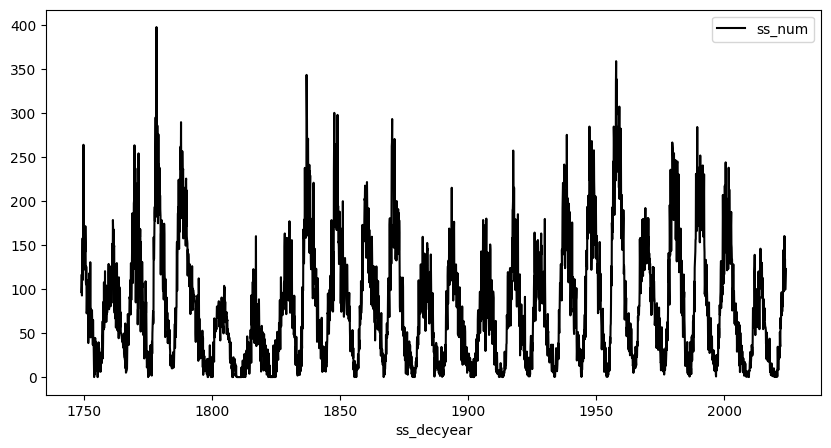

In [ ]:
import pandas as pd

# aqui vou transformar tudo em um pandas
df_sun = pd.read_csv('SN_m_tot_V2.0.csv',header=None,delimiter=';')
df_sun.columns = ['ss_year','ss_month','ss_decyear','ss_num','ss_std','ss_obs','ss_prov']
# caso você queira ver se realmente baixou os dados
df_sun.plot(x='ss_decyear',y='ss_num',color='k',figsize=(10,5))

In [ ]:
# e aqui já vou limitar para o período de 1950 até o presente porque é o que mais me interessa
df_sun = df_sun[(df_sun.ss_decyear>=1950)].reset_index()
df_sun

,index,ss_year,ss_month,ss_decyear,ss_num,ss_std,ss_obs,ss_prov
0,2412,1950,1,1950.042,143.9,8.0,31,1
1,2413,1950,2,1950.123,134.3,7.7,28,1
2,2414,1950,3,1950.204,155.4,8.3,31,1
3,2415,1950,4,1950.288,160.6,8.5,30,1
4,2416,1950,5,1950.371,150.5,8.2,31,1
...,...,...,...,...,...,...,...,...
884,3296,2023,9,2023.705,134.2,18.3,1261,1
885,3297,2023,10,2023.790,99.4,16.0,958,0
886,3298,2023,11,2023.873,105.4,16.7,809,0
887,3299,2023,12,2023.958,114.2,17.9,619,0


Note que estamos usando os dados originais e brutos. Para uma análise mais precisa, é interessante usar uma média móvel suaviazada de 13 meses (o próprio observatório já faz isso, mas ... para os neuróticos é melhor fazer de dentro do python). Vamops fazer um Gráfico um pouco mais bonito, focando apenas de 1950 até o presente, e plotar o dado original com a média móvel. Note também que sobre a média móvel, vamos plotar os "pontos de interesse" que são mudanças no padrão solar. Isso pode ser útil lá na frente.

In [ ]:
import numpy as np

# aqui fazemos a média móvel e encontramos os picos locais (note que ws e n são críticos)
ws = 13 # janela de 13 meses
df_sun['mean_ss_w'] = df_sun.ss_num.rolling(ws, center=True, min_periods=1).mean()
df_sun['var_ss_w'] = df_sun.mean_ss_w.rolling(ws, center=True, min_periods=1).var()

# encontrando os picos de variância
from scipy.signal import argrelextrema
n = 12 # esse número é crítico para não se confundir com disturbios locais. Aqui procuramos picos em uma janela de 12 meses
# que é apenas 1 mês menor do que a janela da média móvel

df_sun['peaks'] = df_sun.iloc[argrelextrema(df_sun.var_ss_w.values, np.greater_equal,
                    order=n)[0]]['var_ss_w']

e plotando...

<ipython-input-17-87bb7fbbd46b>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)
<ipython-input-17-87bb7fbbd46b>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for peak in df_sun[np.isnan(df_sun.peaks)==False]['var_ss_w'].iteritems():


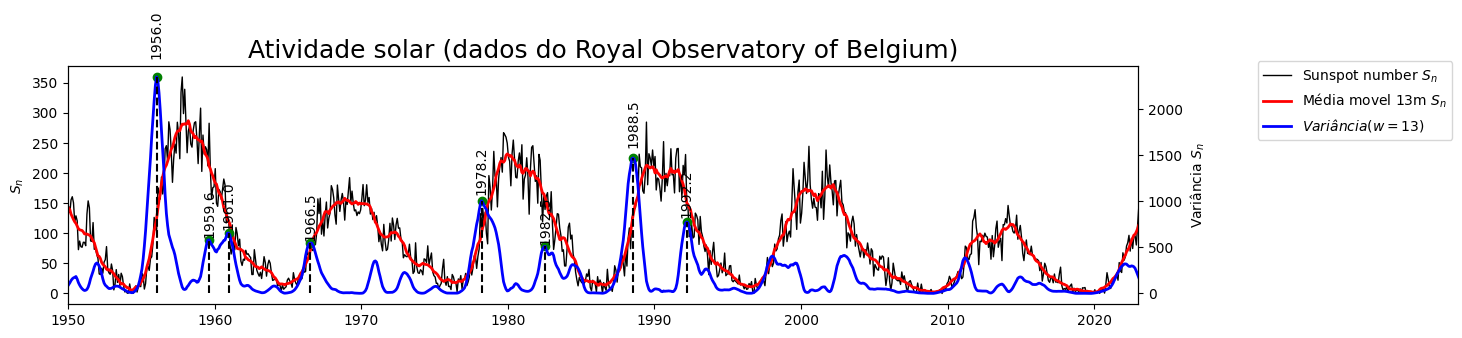

In [ ]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(15,6))

# primeiro dado - sunspot number "bruto"
plt.subplot(2,1,1)
lns1 = plt.plot(df_sun.ss_decyear,df_sun.ss_num,linewidth=1.,color='k',alpha=1,label='Sunspot number $S_n$')

# agora a média móvel
lns2 = plt.plot(df_sun.ss_decyear,df_sun.mean_ss_w,linewidth=2.,color='r',alpha=1,label='Média movel 13m $S_n$')
plt.ylabel('$S_n$')

# abre um eixo secundário para plotar a variância em azul
twin = plt.twinx()
lns3 = twin.plot(df_sun.ss_decyear,df_sun['var_ss_w'],linewidth=2.,color='b',alpha=1,label=f'$Variância (w={ws:.0f})$')
twin.set_ylabel('Variância $S_n$')

# e agora marcamos os picos na variância
for peak in df_sun[np.isnan(df_sun.peaks)==False]['var_ss_w'].iteritems():
  if peak[1] > 500: # veja que marquei aqui com um limite para esses picos
    peak_date = df_sun.iloc[peak[0]].ss_decyear
    twin.vlines(peak_date,0,peak[1],linestyles='dashed',color='k')
    twin.scatter(peak_date,peak[1],color='g')
    twin.text(peak_date,peak[1]*1.1,f'{peak_date:0.1f}',rotation=90,ha='center')

plt.title('Atividade solar (dados do Royal Observatory of Belgium)', fontsize=18)
plt.xlabel('Ano')

plt.xlim([1950,2023])

# Legendas combinadas
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, bbox_to_anchor=(1.3, 1.05))

plt.tight_layout()
plt.show()

Agora, imagine fazer uma wavelet desse sinal. O que será que ele mostraria ? **#ficaadica - desafio**.

In [ ]:
df_sun.to_parquet('sunspot_1950-2023.parquet')